In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Here are gathered methods for generating random signals and also some comparison factors.

In [2]:
# Time series, that we will use for examples
t = np.linspace(0, 10, 2**15)
dt = t[1]

## 1 Pure Random

In [3]:
def pure_random(t, mean=0, σ=1/np.sqrt(2)):
    """
    Uses normal distribution; uses a simple random number generator.
    
    Values are distributed normally, parameters:
    t       - time series
    mean    - mean (expected) value
    σ       - standard deviation of the gaussian distribution
    
    """
    
    N = t.size
    r = np.random.normal(mean, scale=σ, size=N)
    
    return r

### 1.1 Example

In [4]:
r_pure_random = pure_random(t)

In [5]:
R_pure_random = np.fft.rfft(r_pure_random)
f_pure_random = np.fft.rfftfreq(r_pure_random.size, d=dt)

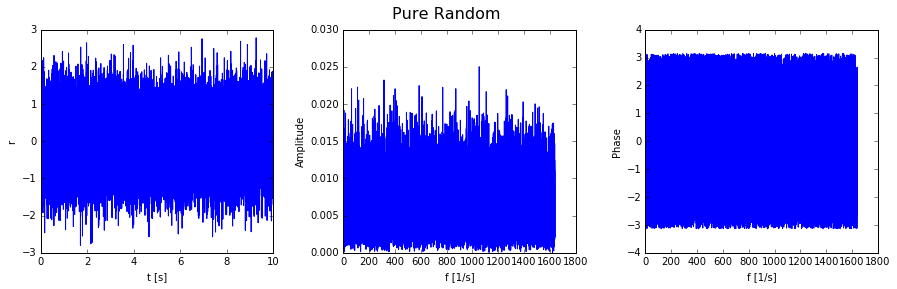

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))
fig.suptitle("Pure Random", fontsize=16)
fig.subplots_adjust(wspace=0.3)

ax1.plot(t, r_pure_random)
ax1.set_xlabel('t [s]')
ax1.set_ylabel('r')

ax2.plot(f_pure_random, np.abs(R_pure_random)/R_pure_random.size)
ax2.set_xlabel('f [1/s]')
ax2.set_ylabel('Amplitude')

ax3.plot(f_pure_random, np.angle(R_pure_random))
ax3.set_xlabel('f [1/s]')
ax3.set_ylabel('Phase')

#plt.savefig('pure_random')

### 1.2 Comparison factors

Generation time

In [7]:
%%timeit
pure_random(t)

1000 loops, best of 3: 903 µs per loop


Energy spectral density

In [8]:
E_pure_random = t[-1]*np.sum(r_pure_random**2)
E_pure_random

163090.82227139798

Power spectral density

In [9]:
P_pure_random = 1/len(t)*np.sum(r_pure_random**2)
P_pure_random

0.49771369101378782

RMS value (Root Mean Square)

In [10]:
RMS_pure_random = np.sqrt(P_pure_random)
RMS_pure_random

0.7054882642636856

Crest factor

In [11]:
c_pure_random = np.max(np.abs(r_pure_random))/RMS_pure_random
c_pure_random

3.9672030778688523

## 2 Pseudo Random

In [58]:
def pseudo_random(t, repeats, A):
    """
    Uniform distribution for phases.
    
    Parameters:
    t       - time series, length = n*repeats, repeats is an integer
    repeats - number of repeats of a time block
    A       - desired amplitudes, length = n//2 + 1
    """
    n = len(t)//repeats
    a = A*(n//2 + 1)
    R = a*np.exp(1j*np.random.uniform(0,2*np.pi,n//2 + 1))
    
    r0 = np.fft.irfft(R) # one block
    r = np.tile(r0, repeats) # N blocks
    
    return r

### 2.1 Example

In [59]:
repeats = 8
n = t.size//repeats
A = np.ones(n//2 +1)

In [60]:
r_pseudo_random = pseudo_random(t, repeats, A)

In [61]:
n_1 = t.size
A_1 = np.ones(n_1//2 +1)
r_pseudo_random_1 = pseudo_random(t, 1, A_1)

In [62]:
R_pseudo_random = np.fft.rfft(r_pseudo_random[:(r_pseudo_random.size/repeats)])
f_pseudo_random = np.fft.rfftfreq(r_pseudo_random[:(r_pseudo_random.size/repeats)].size, d=dt)

/Users/jantomec/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':
/Users/jantomec/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


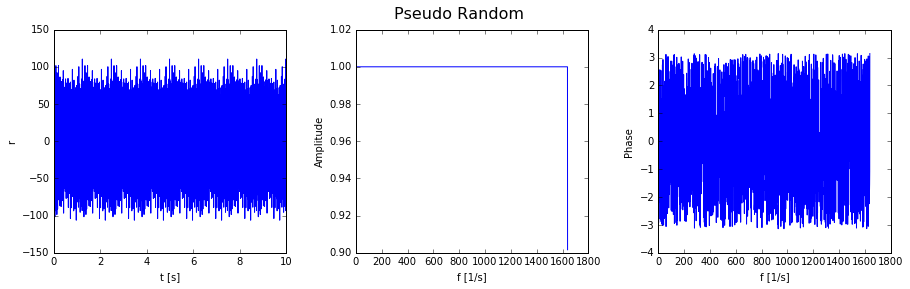

In [63]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))
fig.suptitle("Pseudo Random", fontsize=16)
fig.subplots_adjust(wspace=0.3)

ax1.plot(t, r_pseudo_random)
ax1.set_xlabel('t [s]')
ax1.set_ylabel('r')

ax2.plot(f_pseudo_random, np.abs(R_pseudo_random)/R_pseudo_random.size)
ax2.set_xlabel('f [1/s]')
ax2.set_ylabel('Amplitude')

ax3.plot(f_pseudo_random, np.angle(R_pseudo_random))
ax3.set_xlabel('f [1/s]')
ax3.set_ylabel('Phase')

#plt.savefig('pure_random')

### 2.2 Comparison factors

Generation time for 8 repeats

In [18]:
%%timeit
pseudo_random(t, repeats, A)

The slowest run took 5.99 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 139 µs per loop


Generation time for 1 repeat

In [19]:
%%timeit
pseudo_random(t, 1, A_1)

1000 loops, best of 3: 991 µs per loop


Scaling factor

In [20]:
SF1 = max(abs(r_pure_random))
SF2 = max(abs(r_pseudo_random))
SF = SF1/SF2
r_pseudo_random = r_pseudo_random*SF

Energy spectral density

In [21]:
E_pseudo_random = t[-1]*np.sum(r_pseudo_random**2)
E_pseudo_random

175825.437678438

Power spectral density

In [22]:
P_pseudo_random = 1/len(t)*np.sum(r_pseudo_random**2)
P_pseudo_random

0.53657665307140501

RMS value (Root Mean Square)

In [23]:
RMS_pseudo_random = np.sqrt(P_pseudo_random)
RMS_pseudo_random

0.73251392687880346

Crest factor

In [24]:
c_pseudo_random = np.max(np.abs(r_pseudo_random))/RMS_pseudo_random
c_pseudo_random

3.8208354963472519

## 3 Periodic Random

In [25]:
def periodic_random(t, repeat_sequence, mean=0, σ=1/np.sqrt(2)):
    """
    Uses normal distribution; uses a simple random number generator.
    
    Values are distributed normally, parameters:
    t               - time series
    mean            - mean (expected) value
    σ               - standard deviation of the gaussian distribution
    repeat_sequence - repeat sequence of different time blocks i.e. (AABBCC),
                      where A, B and C are different time blocks with the same time length;
                      example [1, 3, 2] denotes (ABBBCC)
    
    """
    
    r = np.array([])
    
    N = t.size//(sum(repeat_sequence))
    
    for i in repeat_sequence:
        r0 = np.random.normal(mean, scale=σ, size=N)
        r1 = np.tile(r0, i)
        r = np.append(r, r1)
    
    return r

### 3.1 Example

In [26]:
repeat_sequence = [8,8]

In [27]:
r_periodic_random = periodic_random(t, repeat_sequence)

In [28]:
repeat_sequence_1 = [1]
r_periodic_random_1 = periodic_random(t, repeat_sequence_1)

In [29]:
R_periodic_random = np.fft.rfft(r_periodic_random[:(r_periodic_random.size//sum(repeat_sequence))])
f_periodic_random = np.fft.rfftfreq(r_periodic_random[:(r_periodic_random.size//sum(repeat_sequence))].size, d=dt)

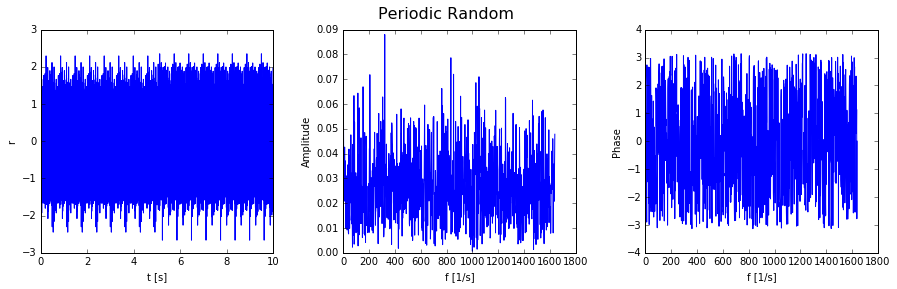

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))
fig.suptitle("Periodic Random", fontsize=16)
fig.subplots_adjust(wspace=0.3)

ax1.plot(t, r_periodic_random)
ax1.set_xlabel('t [s]')
ax1.set_ylabel('r')

ax2.plot(f_periodic_random, np.abs(R_periodic_random)/R_periodic_random.size)
ax2.set_xlabel('f [1/s]')
ax2.set_ylabel('Amplitude')

ax3.plot(f_periodic_random, np.angle(R_periodic_random))
ax3.set_xlabel('f [1/s]')
ax3.set_ylabel('Phase')

#plt.savefig('pure_random')

### 3.2 Comparison factors

Generation time for 8+8 repeats

In [31]:
%%timeit
periodic_random(t, repeat_sequence)

10000 loops, best of 3: 168 µs per loop


Generation time for 1 repeat

In [32]:
%%timeit
periodic_random(t, repeat_sequence_1)

1000 loops, best of 3: 936 µs per loop


Energy spectral density

In [33]:
E_periodic_random = t[-1]*np.sum(r_periodic_random**2)
E_periodic_random

158808.2052315771

Power spectral density

In [34]:
P_periodic_random = 1/len(t)*np.sum(r_periodic_random**2)
P_periodic_random

0.48464418100456874

RMS value (Root Mean Square)

In [35]:
RMS_periodic_random = np.sqrt(P_periodic_random)
RMS_periodic_random

0.69616390383627957

Crest factor

In [36]:
c_periodic_random = np.max(np.abs(r_periodic_random))/RMS_periodic_random
c_periodic_random

3.8209685906938491